## **Regresión Lineal: Coste de un incidente de seguridad**

En este ejercicio se explican los fundamentos básicos de la regresión lineal aplicada a un caso de uso sencillo relacionado con la Ciberseguridad.

### **Enunciado del ejercicio**

El ejercicio consiste en predecir el coste de un incidente de seguridad en base al número de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoria.

### 1. Generación del conjunto de datos

In [8]:
import numpy as np

x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.rand(100, 1)
x
print("La longitud del conjunto de datos es: ", len(x))

La longitud del conjunto de datos es:  100


### 2. Visualización del conjunto de datos


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

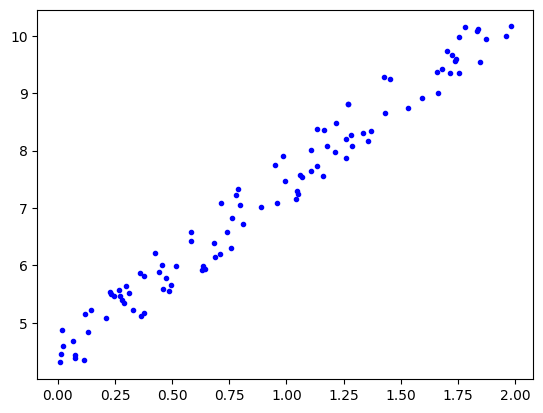

In [6]:
plt.plot(x, y, "b.")
plt.show()

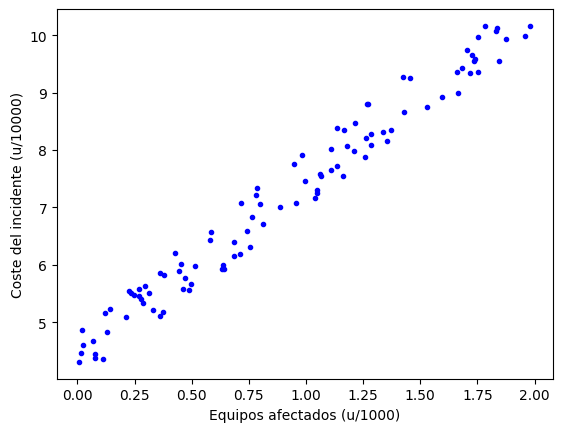

In [7]:
plt.plot(x, y, "b.")
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Coste del incidente (u/10000)")
plt.show()

### 3. Modificación del conjunto de datos

In [11]:
import pandas as pd

In [12]:
data = {'n_equipos_afectados': x.flatten(), 'coste': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,n_equipos_afectados,coste
0,0.336235,5.105471
1,0.169109,4.748457
2,1.903656,10.165775
3,0.632613,6.145220
4,1.363870,8.600974
5,1.240777,8.222798
6,1.488887,8.831806
7,0.723789,6.517700
8,0.876820,6.854869
9,1.758046,10.150103


In [13]:
#Escalado del numero de equipos afectados
df["n_equipos_afectados"] = df["n_equipos_afectados"] * 1000
df["n_equipos_afectados"] = df["n_equipos_afectados"].astype('int')
#Escalado del coste
df["coste"] = df["coste"] * 10000
df["coste"] = df["coste"].astype('int')
df.head(10)

,n_equipos_afectados,coste
0,336,51054
1,169,47484
2,1903,101657
3,632,61452
4,1363,86009
5,1240,82227
6,1488,88318
7,723,65177
8,876,68548
9,1758,101501


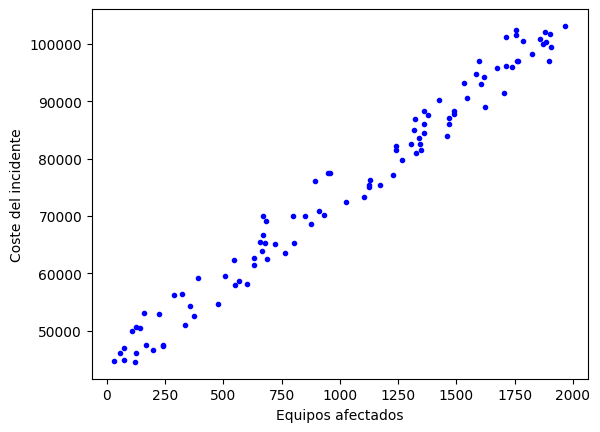

In [14]:
#Representacion grafica del conjunto de datos
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

### 4. Construcción del modelo

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
# Construcción del modelo y ajuste de la función hipótesis
lin_reg = LinearRegression()
lin_reg.fit(df['n_equipos_afectados'].values.reshape(-1,1), df['coste'].values)

LinearRegression()

In [17]:
# Parámetro theta 0
lin_reg.intercept_

43710.58585208425

In [18]:
# Parámetro theta 1
lin_reg.coef_

array([30.36770999])

In [21]:
# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
x_min_max = np.array([[df['n_equipos_afectados'].min()], [df['n_equipos_afectados'].max()]])
y_train_pred = lin_reg.predict(x_min_max)

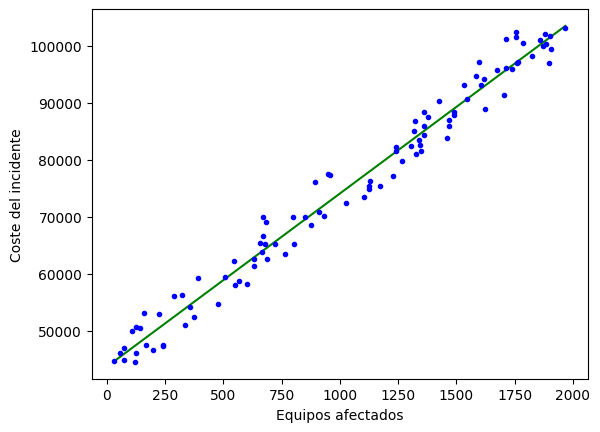

In [22]:
# Representación gráfica de la función hipótesis generada
plt.plot(x_min_max, y_train_pred, "g-")
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

### 5. Predicción de nuevos ejemplos

In [23]:
x_new = np.array([[1200]]) #1200 equipos afcetados

#Prediccion del coste que tendria el incidente
coste = lin_reg.predict(x_new)

print("El coste del incidente sería: ", int(coste[0]), "$")

El coste del incidente sería:  80151 $


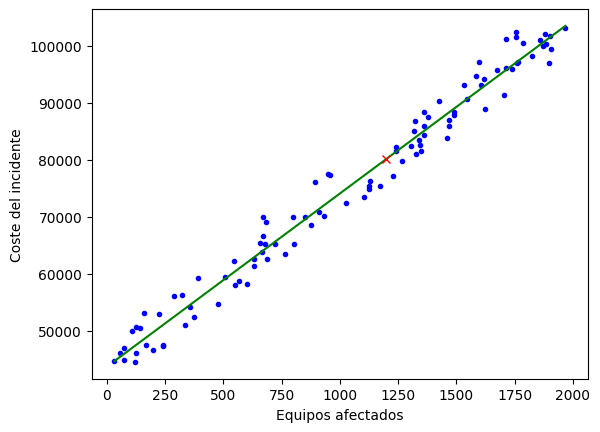

In [24]:
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.plot(x_min_max, y_train_pred, "g-")
plt.plot(x_new, coste, "rx")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()